<a href="https://colab.research.google.com/github/EvoDmiK/TIL/blob/main/AI_study/basic/pytorch/0.basics/0.2.pytorch_geometric_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **0. 참고자료**
## **0-1. 도서**
## **0-2. 논문, 학술지**
## **0-3. 웹 사이트**

- 아기여우의 자기계발 블로그 : Graph Neural Networks (GNN) / 그래프 뉴럴 네트워크 기초 개념 정리 | [[블로그 링크]](https://littlefoxdiary.tistory.com/16)


- Seongsu : 예제를 통해 알아보는 PyTorch Geometric 5 Basic Concepts | [[블로그 링크]](https://baeseongsu.github.io/posts/pytorch-geometric-introduction/)

## **0-4. 데이터셋 출처**


# **1. 그래프 (Graph)**
## **1-1. 그래프 (Graph)란**
- 그래프(Graph)는 노드와 간선으로 이루어진 구조 
  - 아래 이미지는 G = {{1, 2, 3}, {{1,2}, {2, 3}, {1, 3}}}으로 정의된 그래프이다.   
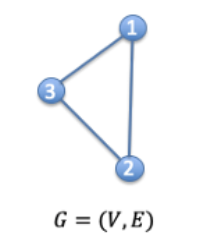

- 수학적으로 그래프 G는 노드 집합 V와 간선 집합 E로 구성된다.
  - 간선 집합 E의 원소 간선 e는 두 개의 노드로 이루어진 순서가 있는 쌍이다.
  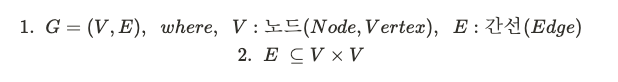

- 두 간선 (a, b)와 (b, a)가 있다고 가정할 때,  
  - 방향성 그래프 (directed graph)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;| 두 간선을 같은 것으로 봄.
  - 비방향성 그래프 (undirected graph) | 두 간선을 다른 것으로 봄.
❗방향성의 그래프를 시각화 할 때, 방향성은 화살표로 표시한다.
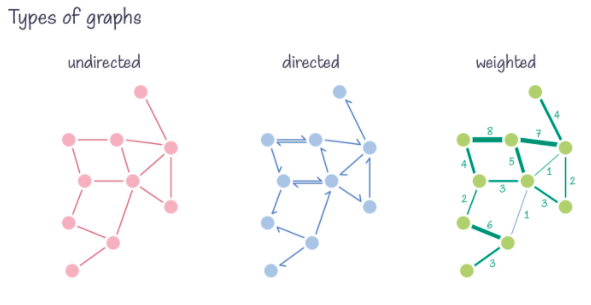


- 그래프는 인접행렬로도 표현할 수 있는데, 그래프가 N개의 노드를 가지고 있다면  
  N x N 인접행렬이 구성된다.  
- 각 노드별 feature의 갯수가 f 개인 경우에는 N x f feature 행렬이 구성된다.

🌱 **e.g.)** G = {{1, 2, 3}, {{1, 2}, {2, 3}, {1,3}}}로 정의되고,  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;각각의 노드가 {[1, 1], [0, 1], [1, 0]}의 feature를 가진다고 하면,  
1. 그래프 G의 인접 행렬

|node|1|2|3|
|:--:|:--:|:--:|:--:|
|1|0|1|1|
|2|1|0|1|
|3|1|1|0|

2. 그래프 G의 특성 행렬

|node|feat1|feat2|
|:--|:--|:--|
|node1|1|1|
|node2|0|1|
|node3|1|0|


## **1-2. 그래프를 사용하는 이유**
- 사람들간의 관계, 상호작용같은 추상적인 개념을 다루기에 적합하다.
- 복잡한 문제를 더 간단한 표현으로 단순화하기도 하고, 다른 관점으로도 표현하여 해결할 수 있다.
- 소셜 네트워크, 미디어의 영향, 바이러스 확산 등을 연구, 모델링 할 수 있다.

## **1-3. 그래프를 분석하기 어려운 이유**
1) 유클리드 공간에 존재하지 않아 좌표계에서 그래프를 표현할 수 없다.
  - 우리에게 익숙한 좌표계에서 표현할 수 없어 이미지나 정형데이터보다 분석이 어렵다. 
 
 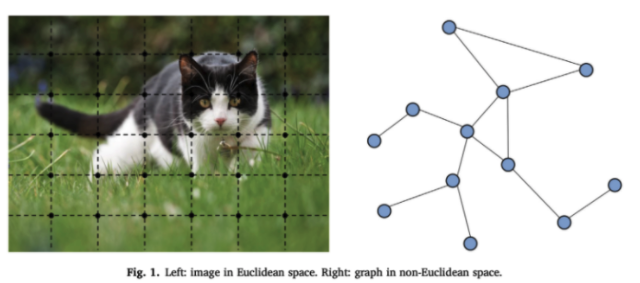

2) 그래프는 고정된 형태로 존재하지 않는다.
  - 동일한 인접행렬을 가진다 해도, 그래프는 무궁무진한 형태로 표현될 수 있다.
  - 아래 두 그래프의 생김새는 달라도 인접행렬은 동일한 것을 볼 수 있다.  
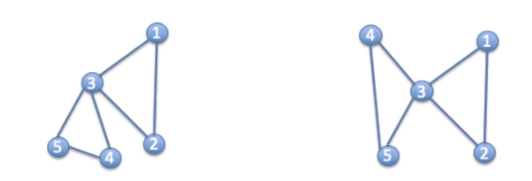

|Node|1|2|3|4|5|
|:--|:--|:--|:--|:--|:--|
|1|0|1|1|0|0|
|2|1|0|1|0|0|
|3|1|1|0|1|1|
|4|0|0|1|0|1|
|5|0|0|1|1|0|

3) 그래프는 사람이 해석할 수 있도록 시각화 하는것이 어렵다.
  - 노드의 개수가 많고 조밀할수혹 그래프를 보고 해석하기 힘들어진다.
  - 아래 예시 이미지만 보아도 무엇이 무엇을 이길 수 있는지 해석하기 힘들다..  
  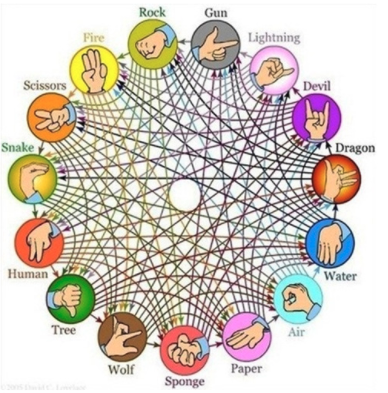




## **1-4. 전통적인 그래프 분석법**
|알고리즘|예시|
|:--|:--|
|탐색 알고리즘|DFS, BFS 등|
|최단 경로 알고리즘|Dijkstra's Algorithm, Nearest Neighbour|
|최소 신장 트리 알고리즘|Prim's Algorithm|
|클러스터링 기법|Highly Connected Components, K-means|

- 위 알고리즘들은 적용하기 전 입력 그래프에 대한 사전지식이 필요하다는 한계가 있다.
  - 여러개의 그래프가 있을때 그래프의 정보를 예측하는 것이 불가능하다.
  - 그래프 자체를 연구하는 것이 불가능하다.

# **2. Node Embedding**

- 그래프의 노드들을 벡터화 하는 것을 Node Embedding이라 한다.
  - Node Embedding은 벡터 형태의 표현 그 자체를 의미한다.
  - 노드가 표현되는 vector 공간을 embedding 공간이라한다.

  

### **1) 그래프 데이터 핸들링**
- Pytorch Geometric에서 하나의 그래프는 torch_geometric.data.Data라는 클래스로 표현되고, 다음과 같은 인자를 받는다.  
⚠️ 아래의 인자값들은 옵션으로, 자신이 구성하고 싶은 속성을 다양하게 모델링 할 수 있다.

|인자값|설명|
|:--|:--|
|x|노드의 특징 행렬|
|edge_index|그래프의 연결성 (인접행렬)|
|edge_attr|엣지 특징 행렬|
|y|target 값|
|pos| 노드 위치 행렬|



In [ ]:
!nvcc -V
!python -V

import torch
torch.__version__

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0
Python 3.7.15


'1.12.1+cu113'

In [ ]:
!pip install torch_geometric
!pip install https://data.pyg.org/whl/torch-1.12.0%2Bcu113/torch_sparse-0.6.15-cp37-cp37m-linux_x86_64.whl
!pip install https://data.pyg.org/whl/torch-1.12.0%2Bcu113/torch_scatter-2.0.9-cp37-cp37m-linux_x86_64.whl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 467 kB 4.7 MB/s 
  Created wheel for torch-geometric: filename=torch_geometric-2.1.0.post1-py3-none-any.whl size=689859 sha256=b02b5cae98f76d0a1252e3fc1d51a17e17101a8cfa4d0eb6f88bd09377d6e17f
  Stored in directory: /root/.cache/pip/wheels/d1/cb/43/f7f2e472de4d7cff31bceddadc36d634e1e545fbc17961c282
Successfully built torch-geometric
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.5 MB 5.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.9 MB 5.2 MB/s 


In [ ]:
from torch_geometric.data import Data

- Data를 통해 그래프를 정의하는 방법은 두 가지가 있다.  
  1) n x 2 형태의 텐서로 정의하는 방법  
  2) (v1, v2) 순서 쌍으로 정의하는 방법  
     -> edge_index를 전치 시킨 후, contiguous()함수를 통해 1)번과 같은 형태로 만든다.

In [ ]:
edge_idx = torch.tensor([[0, 1, 1, 2],
                         [1, 0, 2, 1]], dtype = torch.long)

x    = torch.tensor([[-1], [0], [1]], dtype = torch.float)
data = Data(x = x, edge_index = edge_idx)

data

Data(x=[3, 1], edge_index=[2, 4])

In [ ]:
## 그래프의 연결 정보. 0 <->1 <-> 2 이렇게 연결되어 있는 그래프이다.
edge_idx = torch.tensor([[0, 1],
                         [1, 0],
                         [1, 2],
                         [2, 1]], dtype = torch.long)

## 노드들의 특징 행렬
x    = torch.tensor([[-1], [0], [1]], dtype = torch.float)
data = Data(x = x, edge_index = edge_idx.t().contiguous()) 

data

Data(x=[3, 1], edge_index=[2, 4])

- torch_geometric.data.Data는 다음과 같은 함수도 제공한다.
  
|함수명|설명|
|:--|:--|
|data.keys|해당 속성 이름|
|data.num_nodes|총 노드 개수|
|data.num_edges|총 엣지 개수|
|data.has_isolated_nodes()|고립 노드 여부 확인|
|data.has_self_loops()|셀프 루프 포함 여부 확인|
|data.is_directed()|그래프의 방향성 여부 확인|

In [ ]:
print(f'data keys       : {data.keys} \nnumber of nodes : {data.num_nodes} \nnumber of edges : {data.num_edges}\n')
print(f'has isolated nodes? : {data.has_isolated_nodes()}')
print(f'has self loops?     : {data.has_self_loops()}')
print(f'is graph directed?  : {data.is_directed()}')


data keys       : ['edge_index', 'x'] 
number of nodes : 3 
number of edges : 4

has isolated nodes? : False
has self loops?     : False
is graph directed?  : False
